# Impact of Gene Ontology Updates on Network Properties of Hetinet: A Comparative Analysis of Hetionet 2015 and GO 2024

## Introduction

Gene Ontology (GO) provides a structured and continually updated vocabulary for annotating gene functions, biological processes, and cellular components. Integrating GO annotations into heterogeneous networks, such as Hetionet, enables systematic exploration of gene–biological process relationships and supports network-based analyses in systems biology. As GO is updated, it is important to assess how new annotations affect the structure and properties of such networks.

## Objective

The objective of this study is to systematically compare the network properties of gene–GO term associations from Hetionet GO 2015, the updated GO 2024, and randomly generated gene–GO pairs. We aim to evaluate how updates in GO annotations influence network statistics and to determine whether newly added associations in GO 2024 exhibit distinct or biologically meaningful patterns compared to existing and random associations.

## Hypotheses

**Hypothesis 1: GO Annotation Expansion**

- The GO-gene associations in GO 2024 do not differ from those in Hetionet GO 2015.

**Hypothesis 2: Metapath Statistics for Newly Added Genes**

- For GO terms with ≤250 genes and ≤25% newly added genes, the distributions of GO-gene metapath statistics (e.g., mean DWPC, mean p-value etc.) for newly added genes in GO 2024 are the same as those for Hetionet-associated genes.

**Hypothesis 3: Specificity of Curated vs. Random Associations**

- Randomly generated GO-gene pairs differ significantly in their network connectivity statistics compared to curated associations in Hetionet or GO 2024.


## Datasets

- **Hetio GO 2015:**  
  Gene–GO term associations as represented in the 2015 release of Hetionet.

- **Updated GO 2024:**  
  Gene–GO term associations from the 2024 update of the Gene Ontology, including both previously known and newly added associations.

- **Random GO-G pairs:**  
  Randomly generated gene–GO term pairs, matched in size to the curated datasets, used as a negative control to assess the specificity of observed network properties.

### Read Updated GO Terms (2024)

This section loads the updated 2024 Gene Ontology (GO) annotations, expands gene IDs and symbols, cleans the data, and filters for Biological Process

In [7]:
import pandas as pd

# Load updated GO annotations
upd_go_2024_raw= pd.read_csv(
    'https://raw.githubusercontent.com/NegarJanani/gene-ontology/refs/heads/gh-pages/annotations/taxid_9606/GO_annotations-9606-inferred-allev.tsv',
    sep='\t'
)

# Expand gene_ids and gene_symbols into individual rows
exp_df = upd_go_2024_raw.assign(
    gene_id=upd_go_2024_raw['gene_ids'].str.split('|'),
    gene_symbol=upd_go_2024_raw['gene_symbols'].str.split('|')
)
upd_go_2024_df = exp_df.explode(['gene_id', 'gene_symbol'])

# Clean data
upd_go_2024_df['gene_id'] = upd_go_2024_df['gene_id'].str.strip()
upd_go_2024_df['gene_symbol'] = upd_go_2024_df['gene_symbol'].str.strip()
upd_go_2024_df = upd_go_2024_df[upd_go_2024_df['gene_id'] != '...']
upd_go_2024_df['gene_id'] = upd_go_2024_df['gene_id'].astype(int)

print('Updated (2024) All GO Terms:')
# Keep selected columns
upd_go_2024_df = upd_go_2024_df[['go_id', 'go_name', 'go_domain', 'gene_id', 'gene_symbol']]
display(upd_go_2024_df.head(2))
print(f"#  Updated (2024) pairs of Gene Onctology Terms and Gene: {upd_go_2024_df.shape[0]}\n\n")
print('Updated (2024) GO Terms only for Biological Process:')
upd_go_bp_2024_df=upd_go_2024_df[upd_go_2024_df['go_domain']=='biological_process']
display(upd_go_bp_2024_df.head(2))
#upd_bp_df['gene_id'] = upd_bp_df['gene_id'].astype(int)
print(f"# Updated (2024) pairs of Gene Onctology Terms only for Biological Process and Gene :{upd_go_bp_2024_df.shape[0]}\n\n")

Updated (2024) All GO Terms:


,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000002,mitochondrial genome maintenance,biological_process,142,PARP1
0,GO:0000002,mitochondrial genome maintenance,biological_process,291,SLC25A4


#  Updated (2024) pairs of Gene Onctology Terms and Gene: 1756264


Updated (2024) GO Terms only for Biological Process:


,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000002,mitochondrial genome maintenance,biological_process,142,PARP1
0,GO:0000002,mitochondrial genome maintenance,biological_process,291,SLC25A4


# Updated (2024) pairs of Gene Onctology Terms only for Biological Process and Gene :1089604




In [8]:
upd_go_bp_2024_genes = set(upd_go_bp_2024_df['gene_id'])
len(upd_go_bp_2024_genes)

18810

In [9]:
n_go_bp_2024=len(upd_go_bp_2024_df['go_id'].unique())
print(f"Number of Unique GO Terms for Biological Process in Updated GO is {n_go_bp_2024}")

Number of Unique GO Terms for Biological Process in Updated GO is 15101


In [10]:
n_gene_go_bp_2024=len(upd_go_bp_2024_df['gene_id'].unique())
print(f"Number of Unique genes in GO Terms for Biological Process in Updated GO is {n_gene_go_bp_2024}")

Number of Unique genes in GO Terms for Biological Process in Updated GO is 18810


### Calculate Gene Frequency per GO Term in Updated GO (2024) Biological Process

This section computes the number of genes associated with each GO term in the updated GO (2024) Biological Process dataset.

In [11]:
go_bp_2024_GO_g_freq_df = upd_go_bp_2024_df['go_id'].value_counts().reset_index()
go_bp_2024_GO_g_freq_df.columns = ['go_id', 'no_of_genes_asso_w_go_term_upd_go_bp_2024']

display(go_bp_2024_GO_g_freq_df)

,go_id,no_of_genes_asso_w_go_term_upd_go_bp_2024
0,GO:0008150,18809
1,GO:0009987,16145
2,GO:0065007,12806
3,GO:0050789,12406
4,GO:0050794,12010
...,...,...
15096,GO:2001113,1
15097,GO:2001298,1
15098,GO:2001108,1
15099,GO:0000256,1


### Read Hetionet BP-Gene (BPpG) Data

This section loads the Hetionet Biological Process–Gene (BPpG) associations 

In [12]:
import pandas as pd

hetio_BPpG_df = pd.read_csv('./input/BPpG.csv')
display(hetio_BPpG_df.head(2))


,source_id,target_id,path_count,source_name,target_name,metapath,source_degree,target_degree,source_type,target_type,p_value,DWPC
0,GO:0000002,142,1.0,mitochondrial genome maintenance,PARP1,BPpG,25,152,Biological Process,Gene,NaN,NaN
1,GO:0000002,291,1.0,mitochondrial genome maintenance,SLC25A4,BPpG,25,38,Biological Process,Gene,NaN,NaN


### Count Unique Genes in Hetionet BP-Gene Associations

This section calculates the number of unique genes present in the Hetionet BP-Gene (BPpG) associations.

In [13]:
hetio_BPpG_genes = set(hetio_BPpG_df['target_id'])
len(hetio_BPpG_genes)

14772

In [14]:
hetio_BPpG_go = set(hetio_BPpG_df['source_id'])
len(hetio_BPpG_go)

11381


### Identifying Genes Unique to Updated GO Biological Process 2024

This section calculates the number of genes found in the updated GO Biological Process 2024 dataset that are not present in the Hetionet BP-Gene associations.

In [16]:
new_genes_in_upd_go_bp_2024 = upd_go_bp_2024_genes - hetio_BPpG_genes
print(f"Number of new genes in Updated GO Biological Process (2024) not in Hetionet BPpG: {len(new_genes_in_upd_go_bp_2024)}")

Number of new genes in Updated GO Biological Process (2024) not in Hetionet BPpG: 4389


### Find Common Genes Between Updated GO BP 2024 and Hetionet

This section identifies genes that are present in both the updated GO Biological Process 2024 dataset and the Hetionet BP

In [17]:
existing_hetio_genes = upd_go_bp_2024_genes & hetio_BPpG_genes
len(existing_hetio_genes)

14421

### Read Pre-calculated Hetionet Metapath Statistics (BP-G, MPL3)

This section loads the precomputed Hetionet metapath statistics for Biological Process–Gene (BP-G) pairs with metapath length

In [18]:
import pandas as pd

# Read pickle file
hetio_mp3_pre_cal_stat = pd.read_pickle('./input/pre_cal_hetionet_metapaths_BP_G_MPL3.pkl')

# Preview the data
display(hetio_mp3_pre_cal_stat.head(2))

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


### Aggregating Metapath Statistics for Filtered GO Terms with ≤250 Genes and ≥25% New gene added 

The following block of code processes a filtered list of Gene Ontology (GO) terms that meet the following criteria:
- Each GO term contains **≤250 annotated genes**.
- At least **25% of the genes are newly added** in the 2024 GO update (compared to Hetionet 2015).

For each selected GO term:
- Identifies newly added genes (`new_genes`) by comparing 2024 annotations with the original Hetionet annotations.
- Retrieves metapath statistics (`hetio_mp3_pre_cal_stat`) for both `new_genes` and the existing Hetionet genes.
- Aggregates statistics across all selected GO terms.

The final outputs are:
- `new_gene_stats`: Combined metapath statistics for newly added genes.
- `existing_hetio_genes_stats`: Combined metapath statistics for original Hetionet genes.


In [19]:
upd_go_bp_2024=hetio_mp3_pre_cal_stat[hetio_mp3_pre_cal_stat['target_id'].isin(new_genes_in_upd_go_bp_2024)]

In [20]:
hetio_go=hetio_mp3_pre_cal_stat[hetio_mp3_pre_cal_stat['target_id'].isin(existing_hetio_genes)]

In [21]:
common_GO=(set(upd_go_bp_2024['source_identifier']) & set(hetio_go['source_identifier']))

### Filter Hetionet BP-Gene Associations for Common GO Terms and Existing Genes

This section filters the Hetionet BP-Gene DataFrame to include only those associations where the GO term is in the set of common GO terms and the gene is in the set of existing Hetionet genes.

In [22]:
only_exist_genes_in_hetio_BPpG_df=hetio_BPpG_df[(hetio_BPpG_df['source_id'].isin(set(common_GO))) & (hetio_BPpG_df['target_id'].isin(set(existing_hetio_genes)))]

In [23]:
only_exist_genes_in_hetio_BPpG_df

,source_id,target_id,path_count,source_name,target_name,metapath,source_degree,target_degree,source_type,target_type,p_value,DWPC
0,GO:0000002,142,1.0,mitochondrial genome maintenance,PARP1,BPpG,25,152,Biological Process,Gene,NaN,NaN
1,GO:0000002,291,1.0,mitochondrial genome maintenance,SLC25A4,BPpG,25,38,Biological Process,Gene,NaN,NaN
2,GO:0000002,1763,1.0,mitochondrial genome maintenance,DNA2,BPpG,25,55,Biological Process,Gene,NaN,NaN
3,GO:0000002,1890,1.0,mitochondrial genome maintenance,TYMP,BPpG,25,45,Biological Process,Gene,NaN,NaN
4,GO:0000002,3980,1.0,mitochondrial genome maintenance,LIG3,BPpG,25,39,Biological Process,Gene,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
559499,GO:2001301,246,1.0,lipoxin biosynthetic process,ALOX15,BPpG,2,103,Biological Process,Gene,0.000357,8.395781
559500,GO:2001302,239,1.0,lipoxin A4 metabolic process,ALOX12,BPpG,2,140,Biological Process,Gene,0.000522,8.242324
559501,GO:2001302,246,1.0,lipoxin A4 metabolic process,ALOX15,BPpG,2,103,Biological Process,Gene,0.000357,8.395781
559502,GO:2001303,239,1.0,lipoxin A4 biosynthetic process,ALOX12,BPpG,2,140,Biological Process,Gene,0.000522,8.242324


### Filter Updated GO BP 2024 Associations for Common GO Terms and New Genes

This section filters the updated GO BP 2024 DataFrame to include only those associations where the GO term is in the set of common GO terms and the gene is in the set of new genes found in the updated GO

In [24]:
only_updated_genes_in_upd_go_bp_2024_df = upd_go_bp_2024_df[(upd_go_bp_2024_df['go_id'].isin(set(common_GO))) & (upd_go_bp_2024_df['gene_id'].isin(set(new_genes_in_upd_go_bp_2024)))]

### Count of New Genes Associated with Each GO Term in Updated GO BP 2024

This section calculates the number of new genes associated with each GO term in the filtered updated GO BP 2024

In [25]:
only_updated_genes_in_upd_go_bp_2024_df_freq_df = only_updated_genes_in_upd_go_bp_2024_df['go_id'].value_counts().reset_index()
only_updated_genes_in_upd_go_bp_2024_df_freq_df.columns = ['go_id', 'no_of_n_genes_asso_w_go_terms_upd_go_bp_2024']

display(only_updated_genes_in_upd_go_bp_2024_df_freq_df)

,go_id,no_of_n_genes_asso_w_go_terms_upd_go_bp_2024
0,GO:0010608,621
1,GO:0031047,591
2,GO:0006396,590
3,GO:0016441,583
4,GO:0035194,582
...,...,...
4539,GO:2000980,1
4540,GO:0010838,1
4541,GO:0010867,1
4542,GO:0010875,1


### Count of Existing Genes Associated with Each GO Term in Hetionet BP-Gene

This section calculates the number of existing genes associated with each GO term in the filtered Hetionet BP

In [26]:
only_exist_genes_in_hetio_BPpG_df_freq_df = only_exist_genes_in_hetio_BPpG_df['source_id'].value_counts().reset_index()
only_exist_genes_in_hetio_BPpG_df_freq_df.columns = ['source_id', 'no_of_n_genes_asso_w_go_terms_hetio_BPpG']
only_exist_genes_in_hetio_BPpG_df_freq_df = only_exist_genes_in_hetio_BPpG_df_freq_df.rename(columns={'source_id': 'go_id'})

display(only_exist_genes_in_hetio_BPpG_df_freq_df)

,go_id,no_of_n_genes_asso_w_go_terms_hetio_BPpG
0,GO:0001934,998
1,GO:0048646,997
2,GO:0050776,988
3,GO:1902533,987
4,GO:0061024,978
...,...,...
11169,GO:0046080,1
11170,GO:0006542,1
11171,GO:1902071,1
11172,GO:0009405,1


In [27]:
existing_go_terms_hetio_upd_go_bp_2024=pd.merge(only_updated_genes_in_upd_go_bp_2024_df_freq_df,only_exist_genes_in_hetio_BPpG_df_freq_df,on='go_id', how='inner')
existing_go_terms_hetio_upd_go_bp_2024

,go_id,no_of_n_genes_asso_w_go_terms_upd_go_bp_2024,no_of_n_genes_asso_w_go_terms_hetio_BPpG
0,GO:0010608,621,441
1,GO:0031047,591,143
2,GO:0006396,590,754
3,GO:0016441,583,42
4,GO:0035194,582,41
...,...,...,...
4539,GO:2000980,1,7
4540,GO:0010838,1,10
4541,GO:0010867,1,14
4542,GO:0010875,1,14


### Calculate Percent Change in Gene Count from Hetionet to Updated GO (2024)

This section computes the percent change in the number of genes associated with each GO term between Hetionet and the updated GO

In [28]:
# Calculate percent change in gene count from Hetionet to updated GO (2024)
existing_go_terms_hetio_upd_go_bp_2024['pct_change_genes'] = (
    (existing_go_terms_hetio_upd_go_bp_2024['no_of_n_genes_asso_w_go_terms_upd_go_bp_2024']) /
    existing_go_terms_hetio_upd_go_bp_2024['no_of_n_genes_asso_w_go_terms_hetio_BPpG']
) * 100

display(existing_go_terms_hetio_upd_go_bp_2024.head(4))

,go_id,no_of_n_genes_asso_w_go_terms_upd_go_bp_2024,no_of_n_genes_asso_w_go_terms_hetio_BPpG,pct_change_genes
0,GO:0010608,621,441,140.816327
1,GO:0031047,591,143,413.286713
2,GO:0006396,590,754,78.249337
3,GO:0016441,583,42,1388.095238


### Filter GO Terms with 1–250 Genes in Hetionet and 0–25% Gene Increase in Updated GO

This section filters GO terms to include only those with 1–250 associated genes in Hetionet and up to 1–25% increase in gene count in the

In [29]:
# Filter GO terms with 2–250 genes in Hetionet, and upto 0–25% gene increase in updated GO
filt_existing_go_w_upto_250g_in_hetio_add_25p_upd = existing_go_terms_hetio_upd_go_bp_2024[
    (existing_go_terms_hetio_upd_go_bp_2024['no_of_n_genes_asso_w_go_terms_hetio_BPpG'] >= 1) &
    (existing_go_terms_hetio_upd_go_bp_2024['no_of_n_genes_asso_w_go_terms_hetio_BPpG'] <= 250) &
    (existing_go_terms_hetio_upd_go_bp_2024['pct_change_genes'] > 1) &
    (existing_go_terms_hetio_upd_go_bp_2024['pct_change_genes'] <= 25)
].reset_index(drop=True)

display(filt_existing_go_w_upto_250g_in_hetio_add_25p_upd)

,go_id,no_of_n_genes_asso_w_go_terms_upd_go_bp_2024,no_of_n_genes_asso_w_go_terms_hetio_BPpG,pct_change_genes
0,GO:0000375,53,249,21.285141
1,GO:0000398,53,245,21.632653
2,GO:0002831,53,228,23.245614
3,GO:0000377,53,245,21.632653
4,GO:0071826,46,195,23.589744
...,...,...,...,...
3106,GO:2000980,1,7,14.285714
3107,GO:0010838,1,10,10.000000
3108,GO:0010867,1,14,7.142857
3109,GO:0010875,1,14,7.142857


### Retrieve Metapath Statistics for New Genes in Selected GO Terms

This section retrieves statistics from the precomputed Hetionet metapath data for new genes associated with filtered GO terms (≤250 genes and 0–25% gene increase).

In [59]:
# Retrieve statistics for new genes
new_gene_stats = hetio_mp3_pre_cal_stat[
    (hetio_mp3_pre_cal_stat['source_identifier'].isin(filt_existing_go_w_upto_250g_in_hetio_add_25p_upd['go_id'])) &
    (hetio_mp3_pre_cal_stat['target_id'].isin(new_genes_in_upd_go_bp_2024))
]


In [33]:
new_gene_stats

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
24,3131060,GO:0000712,54504,BPpGbCuG,4,0.003149,0.000067,8.410291,10,15,1411200,240365,3.803284,1.062741,15551,23491,12233025
464,3131585,GO:0006213,8208,BPpGbCuG,4,0.011586,0.000247,7.558210,51,1,7347200,572488,3.938051,1.089268,44328,26952,12235717
702,3131838,GO:0006458,54815,BPpGbCuG,9,0.008674,0.000185,7.827469,55,2,3397600,526591,3.650992,1.082194,28107,27197,12235982
728,3131864,GO:0006465,5912,BPpGbCuG,8,0.005152,0.000110,7.845094,19,1,23648800,714689,4.367343,1.087460,31027,3502,12233605
1390,3132439,GO:0006857,6616,BPpGbCuG,4,0.003122,0.000066,8.359552,6,22,1879200,263533,3.996195,1.042483,42709,6988,12232768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394151,163776694,GO:0071071,22905,BPpGbCdG,1,0.013109,0.000279,7.495979,13,4,7348000,547770,4.064854,1.068595,32106,28603,12116768
46394416,163776991,GO:0072530,11104,BPpGbCdG,2,0.011909,0.000253,7.299785,8,1,72422400,939366,4.829223,1.075693,2520,28592,12116355
46394771,163775349,GO:0045671,54535,BPpGbCdG,1,0.009763,0.000208,7.558009,24,1,17728400,666444,4.323099,1.081505,44651,2681,12117667
46395095,163777450,GO:0098732,26097,BPpGbCdG,8,0.008202,0.000175,7.758605,51,1,6035200,459385,3.995531,1.083822,9937,4111,12119881


In [34]:
len(set(new_gene_stats['source_identifier']))

3111

In [35]:
len(set(new_gene_stats['target_id']))

402

### Group by GO Term and Aggregate Metapath Statistics for New Genes

This section groups the statistics for new genes by GO term (`source_identifier`) and computes the mean for each metric.

In [36]:
# Group by source_identifier and aggregate statistics
aggregate_df_go_new_genes_stats_all = (
    new_gene_stats.groupby('source_identifier').agg(
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean')
    ).reset_index()
)

# Display the first few grouped GO terms
display(aggregate_df_go_new_genes_stats_all)

,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000002,2.174923,0.000157,0.007396,1.255745,0.202649
1,GO:0000012,2.688893,0.000139,0.006552,0.533219,0.308248
2,GO:0000018,3.281539,0.000063,0.002952,1.528196,0.301662
3,GO:0000019,3.377259,0.000183,0.008610,0.882618,0.449035
4,GO:0000027,2.195808,0.000081,0.003807,0.984310,0.213414
...,...,...,...,...,...,...
3106,GO:2001242,3.031614,0.000055,0.002563,2.102393,0.156579
3107,GO:2001243,3.041352,0.000078,0.003649,1.880724,0.207495
3108,GO:2001244,3.072348,0.000045,0.002135,1.685235,0.211367
3109,GO:2001257,3.369173,0.000023,0.001084,1.913519,0.237581


### Retrieve Metapath Statistics for Existing Hetionet Genes in Selected GO Terms

This section retrieves statistics from the precomputed Hetionet metapath data for existing Hetionet genes associated with filtered GO terms (≤250) genes and

In [37]:
     # Retrieve statistics for new genes
    existing_hetio_genes_stats = hetio_mp3_pre_cal_stat[
        (hetio_mp3_pre_cal_stat['source_identifier'].isin(filt_existing_go_w_upto_250g_in_hetio_add_25p_upd['go_id'])) &
        (hetio_mp3_pre_cal_stat['target_id'].isin(existing_hetio_genes))
    ]


In [38]:
existing_hetio_genes_stats

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
5,3131040,GO:0000027,6617,BPpGbCuG,1,1.492915e-02,3.176414e-04,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,4594,12233803
7,3131042,GO:0000027,7507,BPpGbCuG,1,1.492915e-02,3.176414e-04,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,27327,12233803
8,3131043,GO:0000027,9662,BPpGbCuG,1,1.492915e-02,3.176414e-04,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,3188,12233803
9,3131044,GO:0000027,9969,BPpGbCuG,1,1.492915e-02,3.176414e-04,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,960,12233803
18,3131053,GO:0000027,84669,BPpGbCuG,1,1.492915e-02,3.176414e-04,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,755,12233803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46395334,163777742,GO:1901264,57406,BPpGbCdG,1,1.361265e-03,2.896308e-05,8.625486,43,1,6223800,410145,4.058284,1.078177,24558,309,12119225
46395850,163778309,GO:2001015,3309,BPpGbCdG,1,7.468640e-03,1.589072e-04,7.518758,4,1,151257200,963404,5.195444,1.080571,7609,1582,12116027
46395958,163777543,GO:0099565,79143,BPpGbCdG,18,6.821942e-03,1.451477e-04,8.654831,63,16,167400,116270,3.412053,1.094622,14123,1545,12120880
46396070,157899784,GO:0043484,10874,BPpGeAeG,1532,4.115428e-11,8.756231e-13,2.076357,93,26,756000,756000,1.577658,0.064509,18886,43,14576668


In [39]:
len(set(existing_hetio_genes_stats['source_identifier']))

3111

In [40]:
len(set(existing_hetio_genes_stats['target_id']))

3512

### Group by GO Term and Aggregate Metapath Statistics for Existing Hetionet Genes

This section groups the statistics for existing Hetionet genes by GO term (`source_identifier`) and computes the mean for

In [41]:
# Group by source_identifier and aggregate statistics
aggregate_df_go_hetio_genes_stats_all = (
    existing_hetio_genes_stats.groupby('source_identifier').agg(
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean')
    ).reset_index()
)

# Display the first few grouped GO terms
display(aggregate_df_go_hetio_genes_stats_all)

,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000002,2.189561,0.000151,0.007112,1.231363,0.199563
1,GO:0000012,3.302380,0.000105,0.004950,0.760688,0.374550
2,GO:0000018,3.365356,0.000048,0.002249,1.665936,0.268765
3,GO:0000019,3.636114,0.000102,0.004805,0.736847,0.438835
4,GO:0000027,2.000599,0.000069,0.003234,0.892832,0.190296
...,...,...,...,...,...,...
3106,GO:2001242,3.383291,0.000053,0.002502,2.282889,0.192929
3107,GO:2001243,3.188489,0.000052,0.002425,2.003877,0.210813
3108,GO:2001244,3.178512,0.000062,0.002925,1.761411,0.251909
3109,GO:2001257,3.604069,0.000047,0.002204,1.995770,0.262036


In [35]:
len(hetio_BPpG_genes)

14772

In [36]:
len(upd_go_bp_2024_genes)

18810




### Random Sampling of GO-Gene Associations Without Overlap


This section samples random gene associations for each GO term, ensuring that the sampled target IDs do not overlap with the original curated associations for that GO term.  
If an overlap is detected, the sampling is retried up to a maximum number of attempts per GO term.  
The results are saved only for non-overlapping samples.


In [37]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Initialize random number generator
rng = np.random.default_rng(seed=42)

# Container for sampled rows
sampled_rows_all = []

# Get first 10 unique GO IDs
go_ids_subset = filt_existing_go_w_upto_250g_in_hetio_add_25p_upd['go_id'].unique()

# Loop over GO IDs
for go_id in tqdm(go_ids_subset, desc="Sampling random rows per GO ID"):
    go_targets = hetio_BPpG_df[hetio_BPpG_df['source_id'] == go_id]['target_id']
    sample_size = go_targets.nunique()
    original_target_ids = set(go_targets)

    # Skip if invalid size
    if sample_size == 0 or sample_size > len(hetio_mp3_pre_cal_stat):
        continue

    max_attempts = 100
    attempt = 0
    while attempt < max_attempts:
        sampled_rows = hetio_mp3_pre_cal_stat.sample(
            n=sample_size,
            replace=False,
            random_state=int(rng.integers(1e6))
        ).copy()

        sampled_rows['original_go_id'] = go_id
        sampled_rows['original_sample_size'] = sample_size

        sampled_target_ids = set(sampled_rows['target_id'])
        if not (original_target_ids & sampled_target_ids):
            sampled_rows_all.append(sampled_rows)
            break  # Success, move to next GO ID
        attempt += 1

    if attempt == max_attempts:
        print(f"Max attempts reached for GO ID {go_id}. Skipping.")

# Combine and save whatever was sampled without intersection
if sampled_rows_all:
    random_sampled_go = pd.concat(sampled_rows_all, ignore_index=True)
    display(random_sampled_go.head(2))
    random_sampled_go.to_csv('./output/random_sampled_go.csv', index=False)
    print("Sampling completed: Only non-overlapping target IDs saved.")
else:
    print("No non-overlapping samples found.")

Sampling random rows per GO ID: 100%|██████████| 3111/3111 [1:11:07<00:00,  1.37s/it]


,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id,original_go_id,original_sample_size
0,60056017,GO:0018206,27314,BPpGeAuG,62,0.006088,0.000130,1.760421,12,9,44961600,44961600,1.043262,0.165961,12014,1581,14653796,GO:0000375,252
1,160103023,GO:0071450,199,BPpGeAeG,269,0.000647,0.000014,1.470370,15,29,8832000,8832000,0.861508,0.121868,41082,17837,14569651,GO:0000375,252


Sampling completed: Only non-overlapping target IDs saved.


In [42]:
import pandas as pd
random_sampled_go = pd.read_csv('./output/random_sampled_go.csv')   
display(random_sampled_go.head(2))


,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id,original_go_id,original_sample_size
0,60056017,GO:0018206,27314,BPpGeAuG,62,0.006088,0.000130,1.760421,12,9,44961600,44961600,1.043262,0.165961,12014,1581,14653796,GO:0000375,252
1,160103023,GO:0071450,199,BPpGeAeG,269,0.000647,0.000014,1.470370,15,29,8832000,8832000,0.861508,0.121868,41082,17837,14569651,GO:0000375,252


In [43]:
# Group by source_identifier and aggregate statistics
aggregate_random_sampled_go = (
    random_sampled_go.groupby('original_go_id').agg(
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean')
    ).reset_index()
)

# Display the first few grouped GO terms
display(aggregate_random_sampled_go)

,original_go_id,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000002,2.365920,0.000051,0.002381,1.773059,0.109914
1,GO:0000012,3.020630,0.000040,0.001901,2.317126,0.129750
2,GO:0000018,2.744841,0.000054,0.002537,1.786427,0.160302
3,GO:0000019,3.011886,0.000001,0.000049,2.579278,0.080878
4,GO:0000027,2.420736,0.000044,0.002068,1.718079,0.129774
...,...,...,...,...,...,...
3106,GO:2001242,2.736990,0.000060,0.002808,1.872468,0.145379
3107,GO:2001243,2.656470,0.000049,0.002291,1.891901,0.130799
3108,GO:2001244,2.673164,0.000033,0.001573,1.864834,0.135966
3109,GO:2001257,2.711769,0.000048,0.002268,1.906388,0.141674


### Plot Histogram with Three Box and Strip Plots

This section defines a function to visualize the distribution of a selected metric across three groups using vertically stacked box and strip plots, along with a combined histogram and KDE curves. The function also performs statistical comparisons between the groups.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import ticker, font_manager
from scipy.stats import gaussian_kde, ttest_ind

def plot_hist_with_three_box_strip(df1, df2, df3, column,
                                   labels=('Hetio GO 2015', 'Updated GO 2024', 'Random Bucket'),
                                   bins=30, decimals=3, jitter=0.2,
                                   save=False, save_path="plot"):
    data1 = df1[column].dropna()
    data2 = df2[column].dropna()
    data3 = df3[column].dropna()

    # Shared bin edges and axis limits
    combined_min = min(data1.min(), data2.min(), data3.min())
    combined_max = max(data1.max(), data2.max(), data3.max())
    bin_edges = np.linspace(combined_min, combined_max, bins + 1)

    # Colors
    palette = sns.color_palette("colorblind", n_colors=6)
    color_map = {
        labels[0]: palette[0],
        labels[1]: palette[3],
        labels[2]: palette[2]
    }

    bold_font = font_manager.FontProperties(weight='bold')

    # Layout: 3 strip-box plots + 1 histogram
    fig, axes = plt.subplots(4, 1, figsize=(8, 8),
                             gridspec_kw={'height_ratios': [1, 1, 1, 4], 'hspace': 0.15})
    ax_box1, ax_box2, ax_box3, ax_hist = axes

    def box_and_strip(ax, data, label, color):
        sns.stripplot(x=data, ax=ax, color=color,
                      size=0.9, jitter=jitter, alpha=0.5, zorder=1)
        sns.boxplot(x=data, ax=ax, color=color,
                    linewidth=1.5, fliersize=0, notch=True, width=0.4,
                    zorder=2, boxprops=dict(facecolor=color, alpha=0.6))
        ax.set_title(label, fontweight='bold')
        ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel(''); ax.set_ylabel('')
        ax.tick_params(bottom=False, left=False); ax.grid(False)
        sns.despine(ax=ax, left=True, bottom=True)
        ax.spines['bottom'].set_color('black')
        # Ensure all box plots share the same x-axis scale
        ax.set_xlim(combined_min, combined_max)

    # Draw box + strip plots
    box_and_strip(ax_box1, data1, labels[0], color_map[labels[0]])
    box_and_strip(ax_box2, data2, labels[1], color_map[labels[1]])
    box_and_strip(ax_box3, data3, labels[2], color_map[labels[2]])

    # Histograms and KDEs
    for data, label in zip([data1, data2, data3], labels):
        color = color_map[label]
        ax_hist.hist(data, bins=bin_edges, color=color, edgecolor='black',
                     alpha=0.4, label=f'{label} hist')
        kde = gaussian_kde(data)
        x_vals = np.linspace(combined_min, combined_max, 1000)
        kde_vals = kde(x_vals) * len(data) * (bin_edges[1] - bin_edges[0])
        ax_hist.plot(x_vals, kde_vals, color=color, linewidth=2, label=f'{label} KDE')

    # Stats: t-tests + Cohen's d
    def cohen_d(x, y):
        nx, ny = len(x), len(y)
        pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
        return (np.mean(x) - np.mean(y)) / pooled_std

    t12 = ttest_ind(data1, data2, equal_var=False).pvalue
    t13 = ttest_ind(data1, data3, equal_var=False).pvalue
    t23 = ttest_ind(data2, data3, equal_var=False).pvalue

    d12 = cohen_d(data1, data2)
    d13 = cohen_d(data1, data3)
    d23 = cohen_d(data2, data3)

    def format_p(p):
        return "P < 0.001 *" if p < 0.001 else f"P = {p:.1e}"

    # Annotate
    ax_hist.annotate(
        f"{format_p(t12)} (Hetio vs Updated) | d = {d12:.2f}\n"
        f"{format_p(t13)} (Hetio vs Random)  | d = {d13:.2f}\n"
        f"{format_p(t23)} (Updated vs Random)| d = {d23:.2f}",
        xy=(0.98, 1.10), xycoords='axes fraction',
        ha='right', va='top',
        fontsize=10, fontweight='bold', color='black',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='black', linewidth=0.0)
    )

    # Formatting
    ax_hist.set_xlabel(column, fontsize=14, fontweight='bold', color='black')
    ax_hist.set_ylabel('Count', fontsize=14, fontweight='bold', color='black')
    ax_hist.tick_params(axis='both', labelsize=12)
    ax_hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.{decimals}f}"))
    for label in ax_hist.get_xticklabels() + ax_hist.get_yticklabels():
        label.set_fontproperties(bold_font)

    legend = ax_hist.legend(loc='upper right', fontsize=8, frameon=True)
    legend.get_frame().set_alpha(0.0)
    legend.get_frame().set_edgecolor('none')

    ax_hist.grid(False)
    sns.despine(ax=ax_hist)
    ax_hist.spines['bottom'].set_color('black')
    ax_hist.spines['left'].set_color('black')

    plt.subplots_adjust(top=0.96, bottom=0.06)

    if save:
        fig.savefig(f"{save_path}.jpeg", format='jpeg', dpi=600)
        fig.savefig(f"{save_path}.pdf", format='pdf', dpi=600)

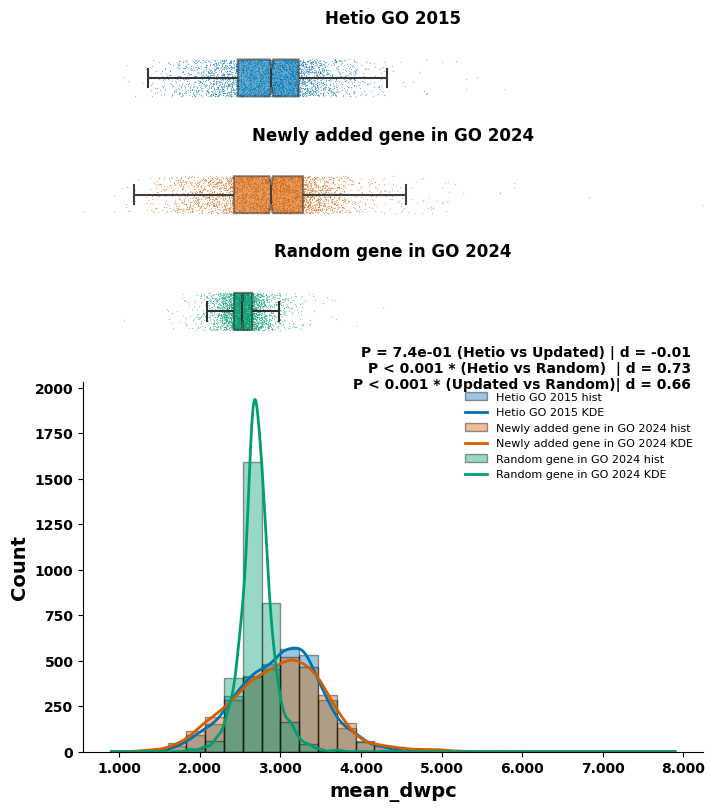

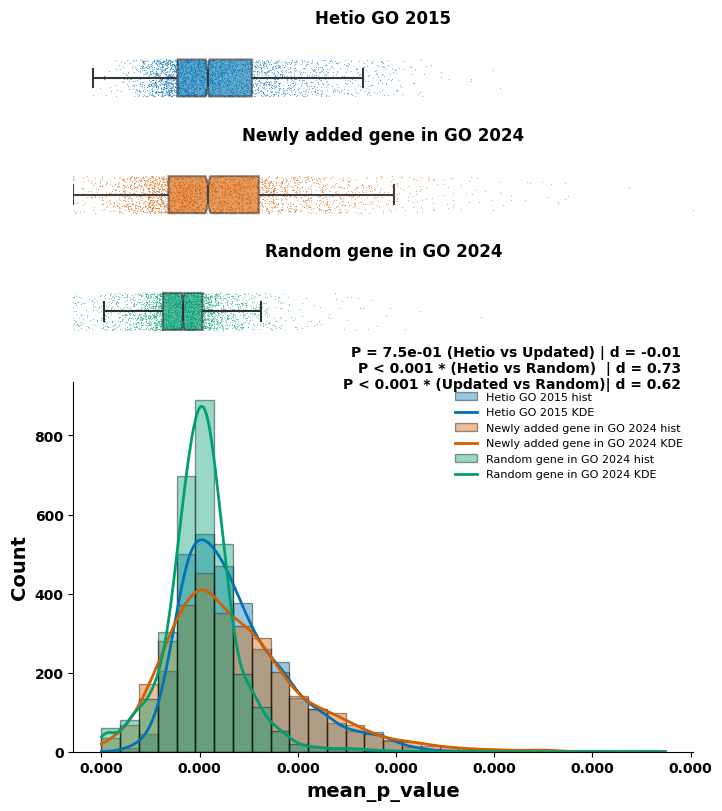

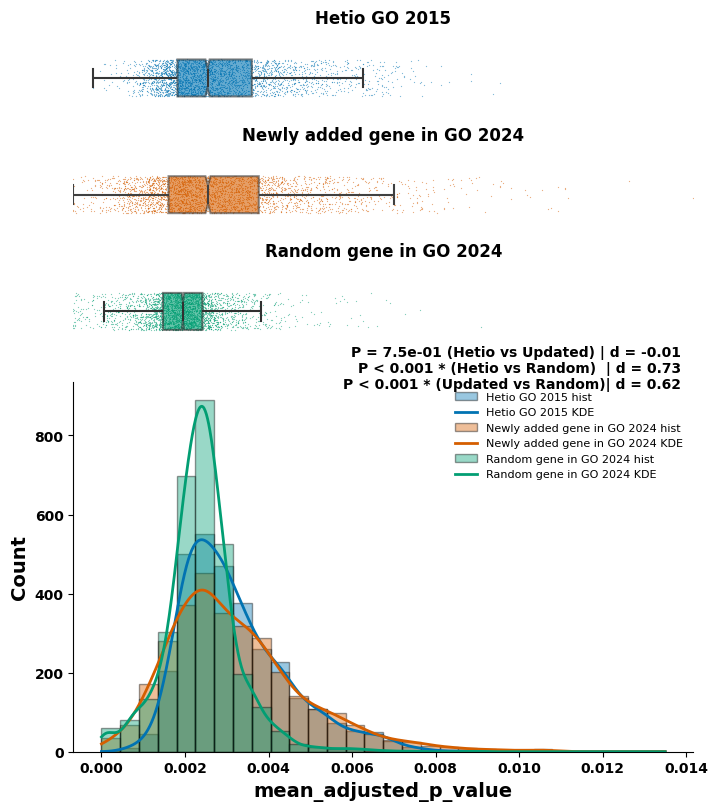

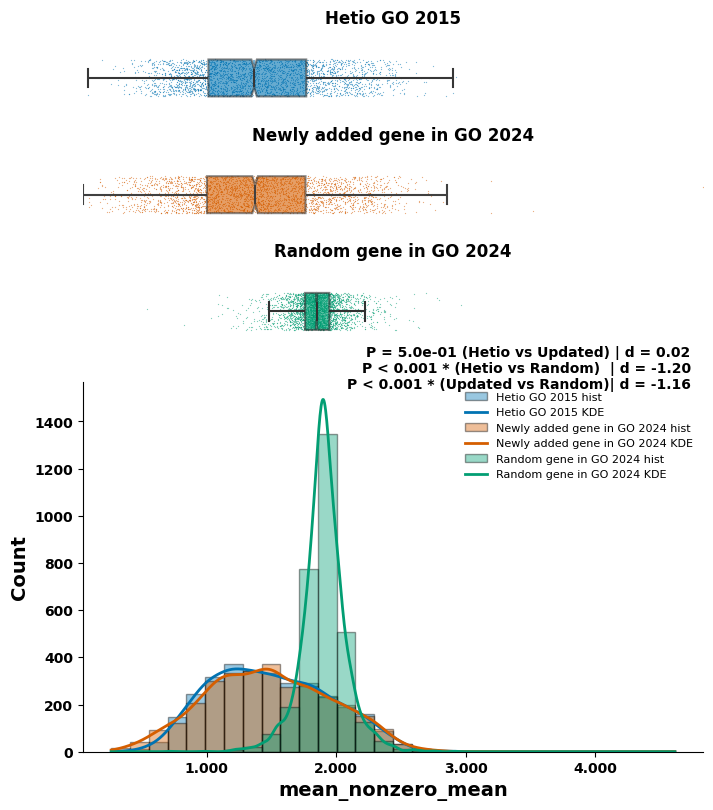

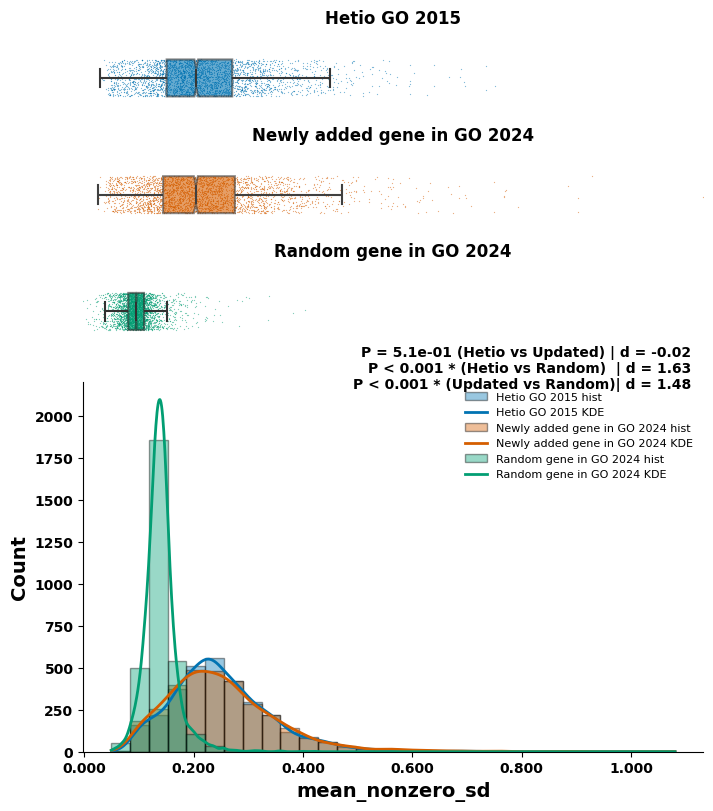

In [45]:
columns_to_plot = ['mean_dwpc','mean_p_value','mean_adjusted_p_value','mean_nonzero_mean','mean_nonzero_sd']  # Replace with your actual column names

for col in columns_to_plot:


    plot_hist_with_three_box_strip(
        df1=aggregate_df_go_hetio_genes_stats_all,
        df2=aggregate_df_go_new_genes_stats_all, 
        df3=aggregate_random_sampled_go,
        column=col,
        labels=('Hetio GO 2015', 'Newly added gene in GO 2024', 'Random gene in GO 2024'),
        save=True,
        save_path=f"./output/threeway_comparison_plot_{col}"
    )


### Correlation and P-Value Reporting for GO-Gene Association Scatter Plots

This section visualizes pairwise comparisons of GO-gene association statistics, reporting the Pearson correlation coefficient (ρ) and the p-value for each comparison directly on the plots.

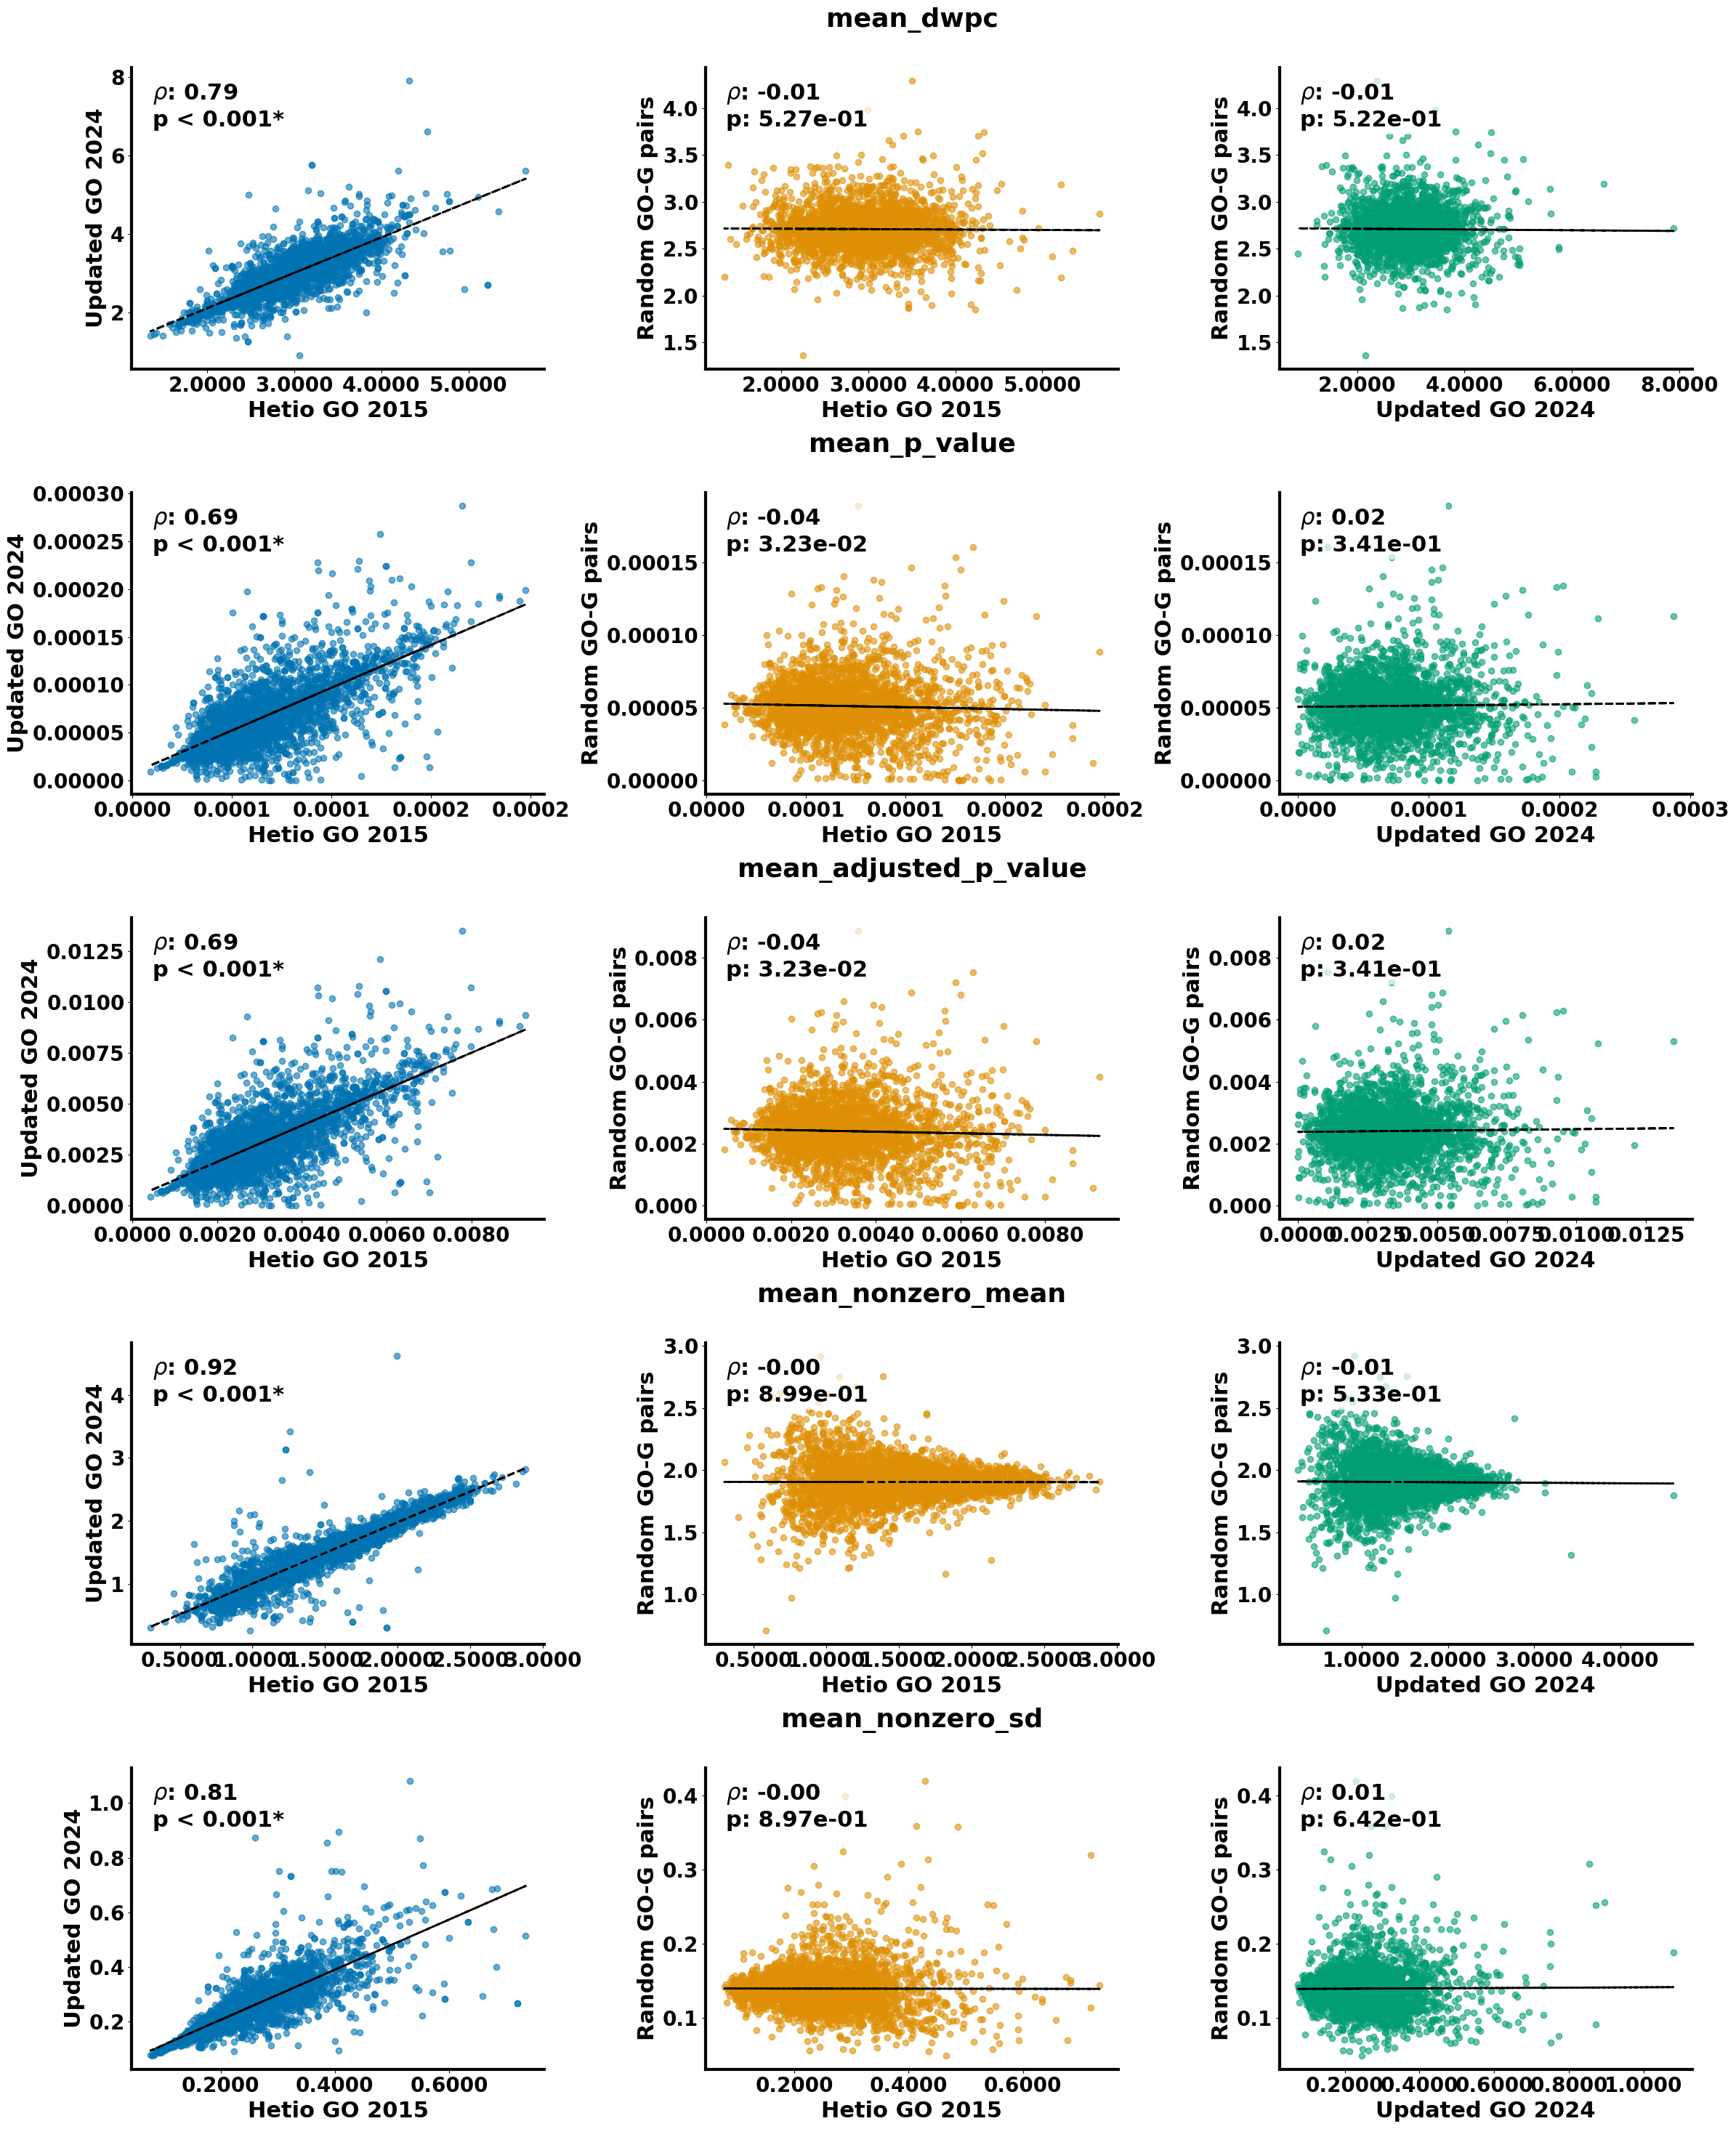

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def scatter_panel_all_columns(
    df1, df2, df3, columns_to_plot,
    labels=('Hetio GO 2015', 'Updated GO 2024', 'Random GO-G pairs'),
    alpha=0.6,
    x_fontsize=22,
    y_fontsize=22,
    title_fontsize=26,
    tick_fontsize=20,
    axis_linewidth=3
):
    n_cols = 3  # Three pairwise plots per column
    n_rows = len(columns_to_plot)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))

    palette = sns.color_palette("colorblind", n_colors=3)

    for row, column in enumerate(columns_to_plot):
        data1 = df1[column].dropna().reset_index(drop=True)
        data2 = df2[column].dropna().reset_index(drop=True)
        data3 = df3[column].dropna().reset_index(drop=True)

        min_len_12 = min(len(data1), len(data2))
        min_len_13 = min(len(data1), len(data3))
        min_len_23 = min(len(data2), len(data3))

        # Hetio vs Updated
        ax = axes[row, 0] if n_rows > 1 else axes[0]
        x1, y1 = data1[:min_len_12], data2[:min_len_12]
        ax.scatter(x1, y1, color=palette[0], alpha=alpha)
        corr_12 = np.corrcoef(x1, y1)[0, 1]
        slope_12, intercept_12, r_value_12, p_value_12, std_err_12 = stats.linregress(x1, y1)
        ax.plot(x1, slope_12 * x1 + intercept_12, color='black', linestyle='--', linewidth=2)
        p_str_12 = "p < 0.001*" if p_value_12 < 0.001 else f"p: {p_value_12:.2e}"
        ax.text(0.05, 0.95, r"$\rho$" + f": {corr_12:.2f}\n{p_str_12}",
                transform=ax.transAxes, fontsize=title_fontsize-4, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        ax.set_xlabel(labels[0], fontsize=x_fontsize, fontweight='bold')
        ax.set_ylabel(labels[1], fontsize=y_fontsize, fontweight='bold')
        ax.tick_params(axis='both', labelsize=tick_fontsize)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontweight('bold')
            label.set_fontsize(tick_fontsize)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_linewidth(axis_linewidth)
        ax.spines['bottom'].set_linewidth(axis_linewidth)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Hetio vs Random GO-G pairs
        ax = axes[row, 1] if n_rows > 1 else axes[1]
        x2, y2 = data1[:min_len_13], data3[:min_len_13]
        ax.scatter(x2, y2, color=palette[1], alpha=alpha)
        corr_13 = np.corrcoef(x2, y2)[0, 1]
        slope_13, intercept_13, r_value_13, p_value_13, std_err_13 = stats.linregress(x2, y2)
        ax.plot(x2, slope_13 * x2 + intercept_13, color='black', linestyle='--', linewidth=2)
        p_str_13 = "p < 0.001*" if p_value_13 < 0.001 else f"p: {p_value_13:.2e}"
        ax.text(0.05, 0.95, r"$\rho$" + f": {corr_13:.2f}\n{p_str_13}",
                transform=ax.transAxes, fontsize=title_fontsize-4, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        ax.set_xlabel(labels[0], fontsize=x_fontsize, fontweight='bold')
        ax.set_ylabel(labels[2], fontsize=y_fontsize, fontweight='bold')
        ax.tick_params(axis='both', labelsize=tick_fontsize)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontweight('bold')
            label.set_fontsize(tick_fontsize)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_linewidth(axis_linewidth)
        ax.spines['bottom'].set_linewidth(axis_linewidth)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Updated vs Random GO-G pairs
        ax = axes[row, 2] if n_rows > 1 else axes[2]
        x3, y3 = data2[:min_len_23], data3[:min_len_23]
        ax.scatter(x3, y3, color=palette[2], alpha=alpha)
        corr_23 = np.corrcoef(x3, y3)[0, 1]
        slope_23, intercept_23, r_value_23, p_value_23, std_err_23 = stats.linregress(x3, y3)
        ax.plot(x3, slope_23 * x3 + intercept_23, color='black', linestyle='--', linewidth=2)
        p_str_23 = "p < 0.001*" if p_value_23 < 0.001 else f"p: {p_value_23:.2e}"
        ax.text(0.05, 0.95, r"$\rho$" + f": {corr_23:.2f}\n{p_str_23}",
                transform=ax.transAxes, fontsize=title_fontsize-4, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        ax.set_xlabel(labels[1], fontsize=x_fontsize, fontweight='bold')
        ax.set_ylabel(labels[2], fontsize=y_fontsize, fontweight='bold')
        ax.tick_params(axis='both', labelsize=tick_fontsize)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontweight('bold')
            label.set_fontsize(tick_fontsize)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_linewidth(axis_linewidth)
        ax.spines['bottom'].set_linewidth(axis_linewidth)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Add a single common title for the row (centered above the three plots)
        if n_rows > 1:
            axes[row, 1].set_title(
                f"{column}",
                fontsize=title_fontsize, fontweight='bold', pad=40
            )
        else:
            axes[1].set_title(
                f"{column}",
                fontsize=title_fontsize, fontweight='bold', pad=40
            )

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.savefig('./output/go_gene_scatter_panel.jpeg', bbox_inches='tight', dpi=300)
    plt.show()

# Example usage:
columns_to_plot = [
    'mean_dwpc', 
    'mean_p_value', 
    'mean_adjusted_p_value', 
    'mean_nonzero_mean', 
    'mean_nonzero_sd'
]

# Sort all input DataFrames by 'source_identifier' before plotting
aggregate_df_go_hetio_genes_stats_all = aggregate_df_go_hetio_genes_stats_all.sort_values('source_identifier').reset_index(drop=True)
aggregate_df_go_new_genes_stats_all = aggregate_df_go_new_genes_stats_all.sort_values('source_identifier').reset_index(drop=True)
aggregate_random_sampled_go = aggregate_random_sampled_go.sort_values('original_go_id').reset_index(drop=True)

# Now call the plotting function
scatter_panel_all_columns(
    df1=aggregate_df_go_hetio_genes_stats_all,
    df2=aggregate_df_go_new_genes_stats_all,
    df3=aggregate_random_sampled_go,
    columns_to_plot=columns_to_plot,
    labels=('Hetio GO 2015', 'Updated GO 2024', 'Random GO-G pairs')
)

## Discussion and Conclusion

### Discussion

In this analysis, we compared the distributions and relationships of metapath-based statistics (such as mean DWPC, mean p-value, mean adjusted p-value, mean nonzero mean, and mean nonzero SD) across three groups: Hetio GO 2015, Updated GO 2024, and Random GO-G pairs. The scatter plots and statistical summaries provided several key insights:

- **Consistency and Change in GO Annotations:**  
  The comparison between Hetio GO 2015 and Updated GO 2024 revealed both stability and evolution in GO term–gene associations. While many associations are preserved, the updated dataset introduces new gene–GO pairs, reflecting the growth of biological knowledge.

- **Statistical Distributions:**  
  The distributions of metapath statistics for the updated GO 2024 group often differ from those of the original Hetio GO 2015 group, especially for GO terms with ≤250 genes and ≤25% gene increase. This suggests that newly added genes in the updated GO are not simply random additions but may have distinct network properties.

- **Random Controls:**  
  The Random GO-G pairs serve as a negative control. Their distributions and scatter plot correlations are generally distinct from both Hetio and Updated GO groups, supporting the biological relevance of the curated associations.

- **Correlations:**  
  The pairwise scatter plots show varying degrees of correlation between the groups. Typically, the correlation between Hetio and Updated GO is higher than between either of these and the random group, further supporting the validity of the updated annotations.

### Conclusion

Our results demonstrate that updates to GO annotations (from 2015 to 2024) introduce new gene–GO associations with distinct network properties, as measured by metapath statistics. These new associations are not random but are biologically meaningful, as evidenced by their statistical profiles and their differences from random gene–GO pairings. The methodology and visualizations used here provide a robust framework for assessing the impact of annotation updates in biological networks and can be extended to future releases or other ontologies.

Overall, this analysis highlights the importance of continuous curation and integration of updated biological knowledge into network resources, and the value of systematic, quantitative comparison to assess the impact of such